In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
# dataset_url = "/content/drive/My Drive/"
# data_dir = tf.keras.utils.get_file('Train', origin=/content/drive/My Drive/, untar=True)
data_dir = pathlib.Path("/content/drive/My Drive/Train")


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

7400


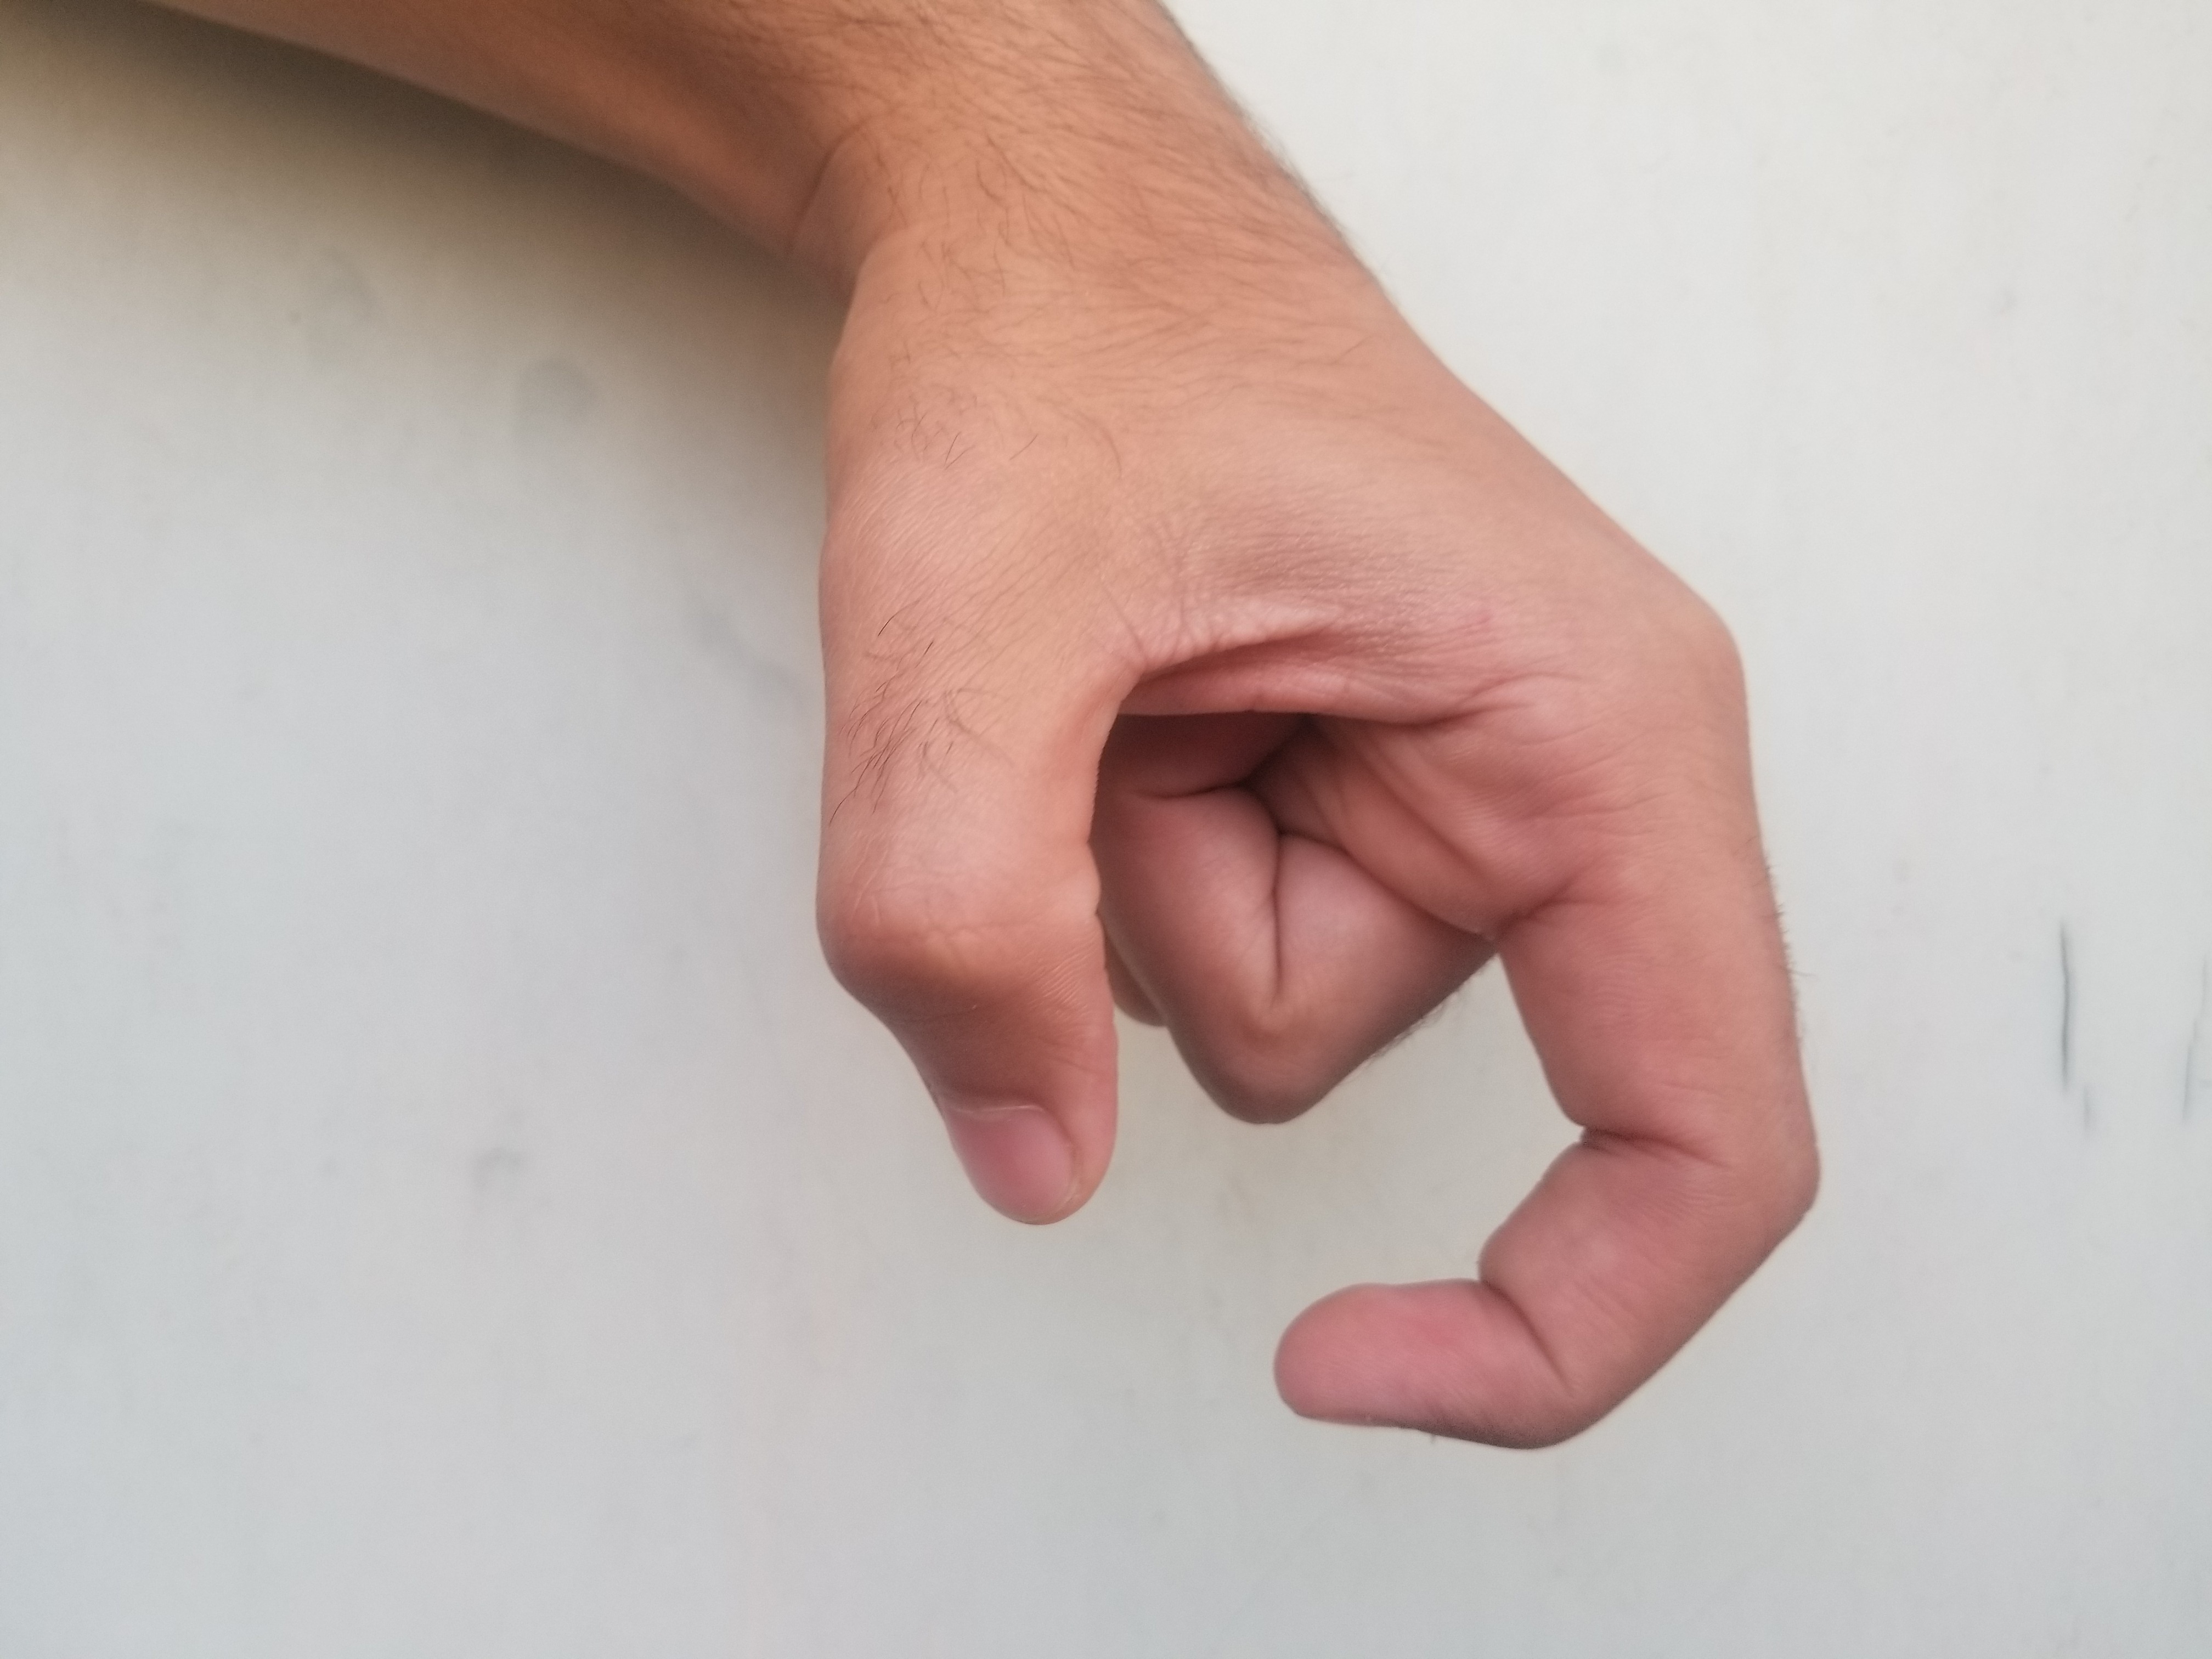

In [ ]:
ain = list(data_dir.glob('ain/*'))
PIL.Image.open(str(ain[0]))

In [ ]:
alif = list(data_dir.glob('alif/*'))
aray = list(data_dir.glob('aray/*'))
bari_ye = list(data_dir.glob('bari_ye/*'))
bay = list(data_dir.glob('bay/*'))
chay = list(data_dir.glob('chay/*'))
choti_ye = list(data_dir.glob('choti_ye/*'))
daal = list(data_dir.glob('daal/*'))
dal = list(data_dir.glob('dal/*'))
dhaal = list(data_dir.glob('dhaal/*'))
dhuaad = list(data_dir.glob('dhuaad/*'))
djay = list(data_dir.glob('djay/*'))
fay = list(data_dir.glob('fay/*'))
gaaf = list(data_dir.glob('gaaf/*'))
ghain = list(data_dir.glob('ghain/*'))
hamza = list(data_dir.glob('hamza/*'))
hay = list(data_dir.glob('hay/*'))
hey = list(data_dir.glob('hey/*'))
jeem = list(data_dir.glob('jeem/*'))
kaaf = list(data_dir.glob('kaaf/*'))
khay = list(data_dir.glob('khay/*'))
laam = list(data_dir.glob('laam/*'))
meem = list(data_dir.glob('meem/*'))
noon = list(data_dir.glob('noon/*'))
pay = list(data_dir.glob('pay/*'))
quaaf = list(data_dir.glob('quaaf/*'))
ray = list(data_dir.glob('ray/*'))
seen = list(data_dir.glob('seen/*'))
sheen = list(data_dir.glob('sheen/*'))
suaad = list(data_dir.glob('suaad/*'))
tay = list(data_dir.glob('tay/*'))
tey = list(data_dir.glob('tey/*'))
thay = list(data_dir.glob('thay/*'))
toay = list(data_dir.glob('toay/*'))
vao = list(data_dir.glob('vao/*'))
zay = list(data_dir.glob('zay/*'))
zoe = list(data_dir.glob('zoe/*'))

In [ ]:
batch_size = 32
img_height = 320
img_width = 320

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7400 files belonging to 37 classes.
Using 5920 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7400 files belonging to 37 classes.
Using 1480 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['ain', 'alif', 'aray', 'bari_ye', 'bay', 'chay', 'choti_ye', 'daal', 'dal', 'dhaal', 'dhuaad', 'djay', 'fay', 'gaaf', 'ghain', 'hamza', 'hay', 'hey', 'jeem', 'kaaf', 'khay', 'laam', 'meem', 'noon', 'pay', 'quaaf', 'ray', 'seen', 'sheen', 'suaad', 'tay', 'tey', 'thay', 'toay', 'vao', 'zay', 'zoe']


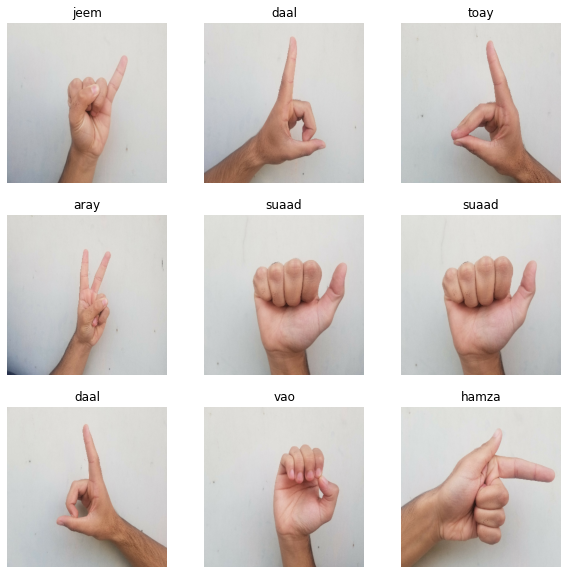

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 320, 320, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.095227145 0.99809813


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 320, 320, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 320, 320, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 160, 160, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 80, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 64)        1

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
185/185 [==============================] - 909s 5s/step - loss: 1.1549 - accuracy: 0.6912 - val_loss: 0.0707 - val_accuracy: 0.9784
Epoch 2/100
185/185 [==============================] - 23s 122ms/step - loss: 0.0457 - accuracy: 0.9851 - val_loss: 0.0293 - val_accuracy: 0.9932
Epoch 3/100
185/185 [==============================] - 22s 120ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 9.5298e-04 - val_accuracy: 1.0000
Epoch 4/100
185/185 [==============================] - 22s 121ms/step - loss: 2.8592e-04 - accuracy: 1.0000 - val_loss: 1.8638e-04 - val_accuracy: 1.0000
Epoch 5/100
185/185 [==============================] - 22s 120ms/step - loss: 7.0168e-05 - accuracy: 1.0000 - val_loss: 1.2062e-04 - val_accuracy: 1.0000
Epoch 6/100
185/185 [==============================] - 22s 121ms/step - loss: 4.4873e-05 - accuracy: 1.0000 - val_loss: 8.2444e-05 - val_accuracy: 1.0000
Epoch 7/100
185/185 [==============================] - 22s 121ms/step - loss: 2.9740e-05 - accurac

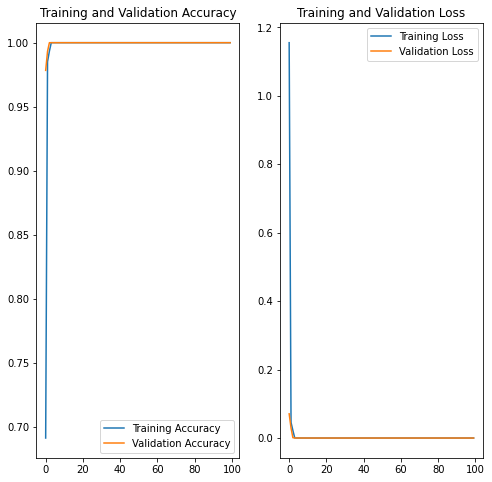

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices((images)).batch(1).take(100):
    yield [tf.dtypes.cast(data, tf.float32)]

In [ ]:
import tensorflow as tf
tfmodel='sign_language_tensorflow'
tf.saved_model.save(model,tfmodel)
converter = tf.lite.TFLiteConverter.from_saved_model(tfmodel)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8  # or tf.uint8
converter.inference_output_type = tf.uint8  # or tf.uint8
tflite_quant_model = converter.convert()

tflmodel='sign_language.tflite'

with open(tflmodel,"wb") as f:
    f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: sign_language_tensorflow/assets
